Import used libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import norm

# The distribution functions of the used variables:

## Gold Price
Import the gold price from csv file:

In [3]:
gold_price_daily_raw = pd.read_csv("Gold_Daily_Prices_EUR.csv")

In [4]:
gold_price_daily_raw.head()

,Date,Value
0,2018-10-05,1045.83
1,2018-10-04,1044.57
2,2018-10-03,1041.08
3,2018-10-02,1042.53
4,2018-10-01,1026.67


In [5]:
gold_price_daily = pd.Series(gold_price_daily_raw['Value']);

Histogram and fitted normal distribution of the gold price:

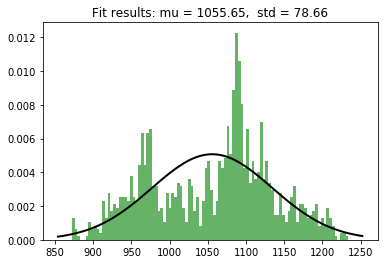

In [6]:
mu, std = norm.fit(gold_price_daily)

plt.hist(gold_price_daily, bins=100, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Launch Costs

In [7]:
pd_initial_cash_flow = np.random.triangular(2900000000, 3350000000, 3450000000)

Plot a histogram:

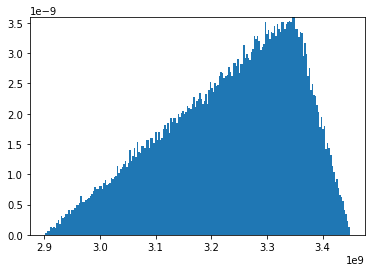

In [8]:
histogram_initial_cash_flow = plt.hist(np.random.triangular(2900000000, 3350000000, 3450000000, 100000), bins=200, density=True)
plt.show(histogram_initial_cash_flow)

## Gold Amount

In [9]:
pd_gold_volume = np.random.triangular(8000000, 10000000, 14000000)

Plot a histogram:

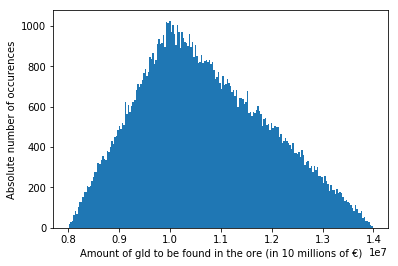

In [18]:
histogram_gold_volume = plt.hist(np.random.triangular(8000000, 10000000, 14000000, 100000), bins=200, density=False)
plt.xlabel('Amount of gld to be found in the ore (in 10 millions of €)')
plt.ylabel('Absolute number of occurences')
plt.show(histogram_gold_volume)


## Operating Costs

In [11]:
pd_cost_cash_flow = np.random.triangular(0.5, 0.6, 0.7)

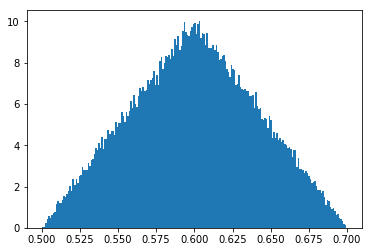

In [12]:
histogram_cost_cash_flow = plt.hist(np.random.triangular(0.5, 0.6, 0.7, 100000), bins=200, density=True)
plt.show(histogram_cost_cash_flow)

## Discount Rate (WACC)

In [13]:
pd_WACC = np.random.triangular(0.07, 0.08, 0.09)

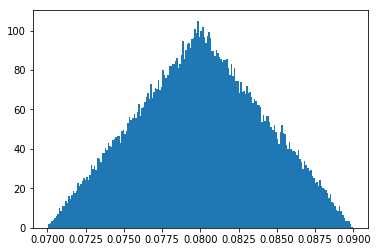

In [14]:
histogram_WACC = plt.hist(np.random.triangular(0.07, 0.08, 0.09, 100000), bins=200, density=True)
plt.show(histogram_WACC)

# Monte Carlo Simulation

In [15]:
Monte_Carlo_NPVs = []
run_numbers = []
run_number = 1


number_of_runs = 1000000
counter = 0

while counter < number_of_runs:
    
    
    #variables that have to be drawn only once per NPV calculation:
    
    #ICF = Initial Cash Flow drawn from distribution
    
    initial_cash_flow = np.random.triangular(2900000000, 3350000000, 3450000000)
   
    
    #gold_amount = amount of gold found
    
    gold_amount = np.random.triangular(8000000, 10000000, 14000000)
    
    
    #variables that are drawn multpile times during the NPV calculation
    
    #gold_price = gold price drawn for every year
    
    mu, sigma = 1055.65, 78.66
    gold_price_year_1 = np.random.normal(mu, sigma)
    gold_price_year_2 = np.random.normal(mu, sigma)
    gold_price_year_3 = np.random.normal(mu, sigma)
    gold_price_year_4 = np.random.normal(mu, sigma)
   
    #cost_cash_flow = drawn every year
    
    cost_cash_flow_year_1 = (gold_price_year_1 * (gold_amount/5)) * np.random.triangular(0.5, 0.6, 0.7)
    cost_cash_flow_year_2 = (gold_price_year_2 * (gold_amount/5)) * np.random.triangular(0.5, 0.6, 0.7)
    cost_cash_flow_year_3 = (gold_price_year_3 * (gold_amount/5)) * np.random.triangular(0.5, 0.6, 0.7)
    cost_cash_flow_year_4 = (gold_price_year_4 * (gold_amount/5)) * np.random.triangular(0.5, 0.6, 0.7)
    
    #revenue cash flow drawn every year
    
    revenue_cash_flow_year_1 = gold_price_year_1 * (gold_amount/5)
    revenue_cash_flow_year_2 = gold_price_year_2 * (gold_amount/5)
    revenue_cash_flow_year_3 = gold_price_year_3 * (gold_amount/5)
    revenue_cash_flow_year_4 = gold_price_year_4 * (gold_amount/5)
    
    # WACC/discount rate drawn every year
    
    WACC_year_1 = np.random.triangular(0.07, 0.08, 0.09)
    WACC_year_2 = np.random.triangular(0.07, 0.08, 0.09)
    WACC_year_3 = np.random.triangular(0.07, 0.08, 0.09)
    WACC_year_4 = np.random.triangular(0.07, 0.08, 0.09)
    
    # PV after every year
    
    PV_year_0 = -initial_cash_flow
    PV_year_1 = (revenue_cash_flow_year_1 - cost_cash_flow_year_1) / ((1 + WACC_year_1))
    PV_year_2 = (revenue_cash_flow_year_2 - cost_cash_flow_year_2) / ((1 + WACC_year_2) ** 2)
    PV_year_3 = (revenue_cash_flow_year_3 - cost_cash_flow_year_3) / ((1 + WACC_year_3) ** 3)
    PV_year_4 = (revenue_cash_flow_year_4 - cost_cash_flow_year_4) / ((1 + WACC_year_4) ** 4)
    
    
   
    NPV = PV_year_0 + PV_year_1 + PV_year_2 + PV_year_3 + PV_year_4
    
    Monte_Carlo_NPVs.append(NPV)
    run_numbers.append(run_number)
    run_number += 1
    
    counter += 1

In [16]:
len(Monte_Carlo_NPVs)

1000000

In [17]:
data = {'Number of Run': run_numbers, 'NPV': Monte_Carlo_NPVs}
End_DataFrame = pd.DataFrame(data = data)
End_DataFrame.set_index('Number of Run');

## NPV Distribution

In [18]:
End_DataFrame_NPV_rescaled = End_DataFrame['NPV']/1000000

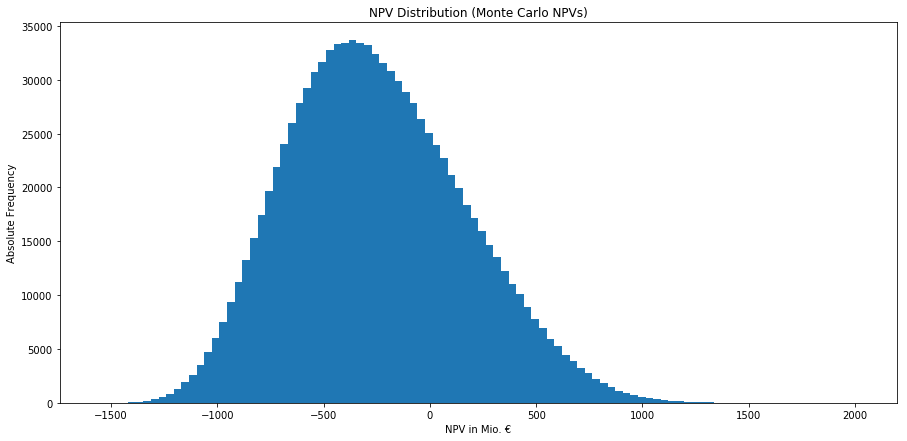

In [19]:
plt.figure(figsize=(15,7))
plt.hist(End_DataFrame_NPV_rescaled, bins=100, density= False);
plt.title('NPV Distribution (Monte Carlo NPVs)')
plt.xlabel('NPV in Mio. €')
plt.ylabel('Absolute Frequency');

In [32]:
End_DataFrame.head()

,Number of Run,NPV
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [21]:
End_NPVs = End_DataFrame['NPV']

## Option Payoff Distribution

The term “non-linear” is often applied to real options. This simply means that the project payoff has two different outcomes: zero for the terminated cases and a positive net profit for the successful cases, reflecting the contingent decision-making. A real op- tion valuation is always positive denoting a rational decision to invest the significant launch costs only if today we forecast a positive risk-adjusted NPV at launch time.

In [22]:
End_NPVs[End_NPVs < 0] = 0

/Users/Malte/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
End_NPVs_rescaled = End_NPVs/1000000

In [24]:
End_NPVs_rescaled.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: NPV, dtype: float64

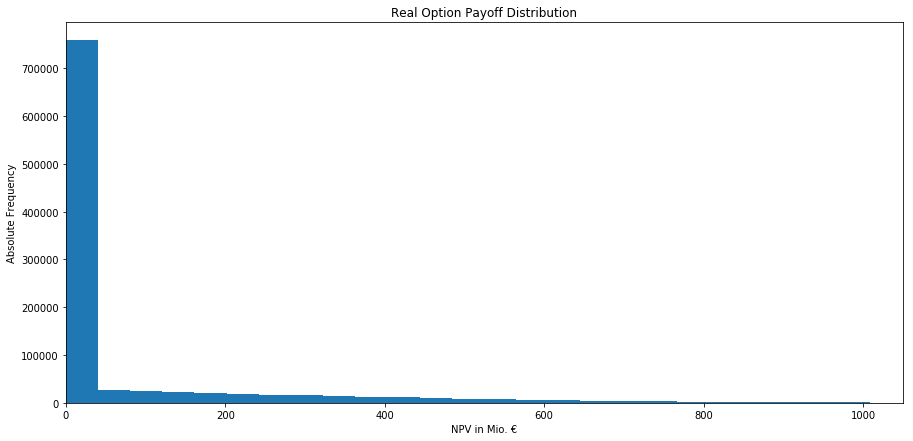

In [25]:
plt.figure(figsize=(15,7))
plt.xlim([0, 1050])
histogram_End_NPVs = plt.hist(End_NPVs_rescaled, bins=50)
plt.title('Real Option Payoff Distribution')
plt.ylabel('Absolute Frequency')
plt.xlabel('NPV in Mio. €');

In [26]:
End_NPVs.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: NPV, dtype: float64

## Risk-adjusted probability of success

In [27]:
number_of_nonzero_NPVs = np.count_nonzero(End_NPVs)

In [28]:
probability_of_success = (number_of_nonzero_NPVs/len(Monte_Carlo_NPVs))
'The risk-adjusted probability of success is {}%'.format(probability_of_success*100)

'The risk-adjusted probability of success is 26.898300000000003%'

In [29]:
test = np.histogram(End_NPVs, bins=2, density=False )
test

(array([998169,   1831]),
 array([0.00000000e+00, 1.00843838e+09, 2.01687676e+09]))

## Mean Value of Successful Outcomes

In [30]:
Mean_of_successful_outcomes = sum(End_NPVs)/number_of_nonzero_NPVs
Mean_of_successful_outcomes

284688230.4322143

## Real Option Value

In [31]:
ROV = probability_of_success * Mean_of_successful_outcomes
ROV

76576294.28634831